# Project Case: Boston Housing Data

## Required libraries

The libraries that we'll be using are:

* **pandas:** Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **matplotlib:** Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Scipy stats:** Scipy module containing a large number of summary and frequency statistics, probability distributions, correlation functions and statistical tests.
* **Statsmodels:** Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

## Task 1: Become familiar with the dataset

### 1.1. Loading and checking the data

We create a new `DataFrame` by importing the CSV file:

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

To verify the DataFrame has loaded correctly, we can run a `head()` command to display the first few records:

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


We remove 'Unnamed:0' column:

In [4]:
boston_df.drop('Unnamed: 0', axis=1, inplace=True)

We can explore Pandas `shape` attribute to check dimensions of the DataFrame:

In [5]:
boston_df.shape

(506, 13)

Our DataFrame consists of 13 variables and 506 records. Everything seems ok, we can investigate our dataset further.

### 1.2 Investigate the dataset

We can run `info()` method to get basic information about the dataset:

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


All 13 variables are `float` data type with no NAs. We could change 'CHAS' data type to `int` data type to save some memory however will skip this step for the purpose of this excercise.

We can run `describe()` method to generate descriptive statistics of the data in the DataFrame:

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Generate Descriptive Statistics and Visualizations

### 2.1. For the "Median value of owner-occupied homes" provide a **boxplot**

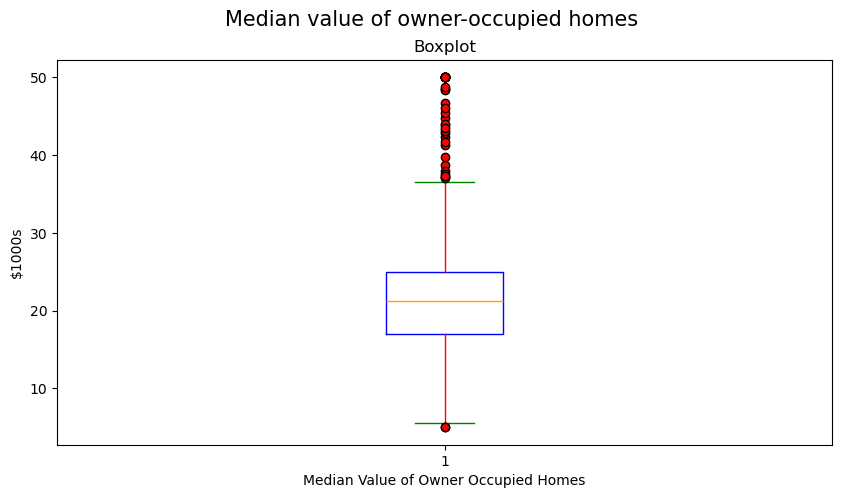

In [8]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot(boston_df['MEDV']
            , boxprops=dict(color='blue')
            , whiskerprops=dict(color='red')
            , capprops=dict(color='green')
            , medianprops=dict(color='orange')
            , flierprops=dict(markerfacecolor='red'
            , marker='o'))
plt.xlabel('Median Value of Owner Occupied Homes')
plt.ylabel('$1000s')
plt.suptitle('Median value of owner-occupied homes', size=15)
plt.title('Boxplot')
plt.show()

**Explanation:** Median value of owner occupied homes is around \\$21,000 with highest value at around \\$50,000 and lowest value at around \\$5,000. 1st quartile is around \\$17,000 and 3rd quartile at around \\$25,000. The distribution of median value of owner occupied homes is positively skewed.

### 2.2. Provide a **bar plot** for the Charles river variable

In [9]:
counts = boston_df['CHAS'].value_counts()

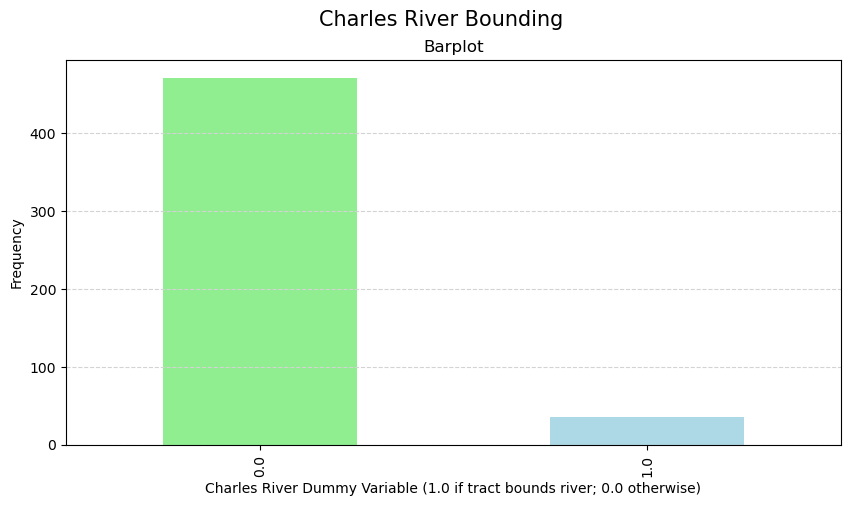

In [10]:
counts.plot(kind="bar", figsize=(10,5), color=['lightgreen', 'lightblue'])
plt.grid(axis='y', which='both', color='lightgrey', linestyle='--')
plt.suptitle('Charles River Bounding', size=15)
plt.title('Barplot')
plt.xlabel('Charles River Dummy Variable (1.0 if tract bounds river; 0.0 otherwise)')
plt.ylabel('Frequency')
plt.show()

**Explanation:** Majority of entries do not bounds Charles river.

### 2.3. Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

First, we discretize the AGE variable into 3 buckets:

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

age_group_1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
age_group_2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
age_group_3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
age_group = [age_group_1, age_group_2, age_group_3]

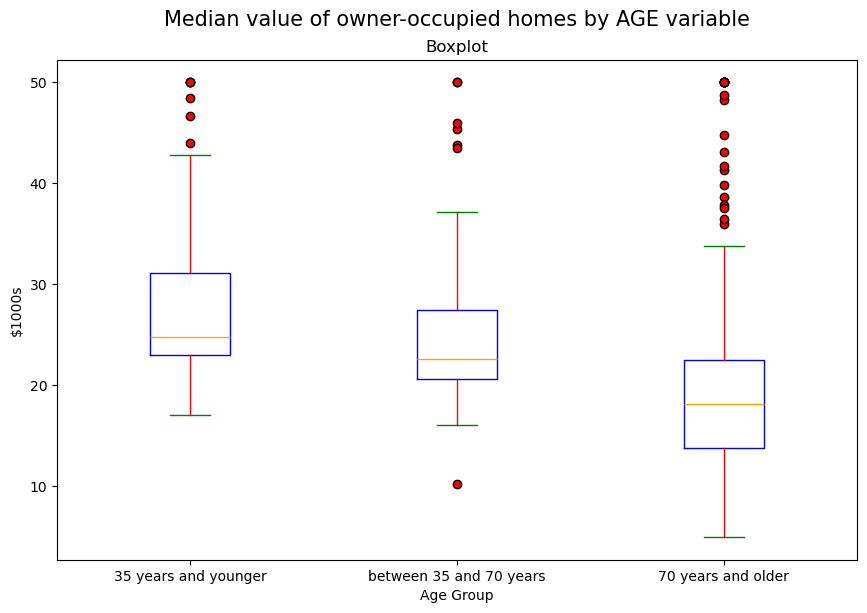

In [12]:
fig = plt.figure(figsize =(8, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(age_group, boxprops=dict(color='blue'), whiskerprops=dict(color='red'), capprops=dict(color='green'), medianprops=dict(color='orange'), flierprops=dict(markerfacecolor='red', marker='o'))
ax.set_xticklabels(['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.xlabel('Age Group')
plt.ylabel('$1000s')
plt.suptitle('Median value of owner-occupied homes by AGE variable', size=15, y=1.1)
plt.title('Boxplot')
plt.show()

**Explanation:**  Median value of owner-occupied homes decreases as proportion of owner-occupied units built prior to 1940 increases. There may be a negative correlation.

### 2.4. Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

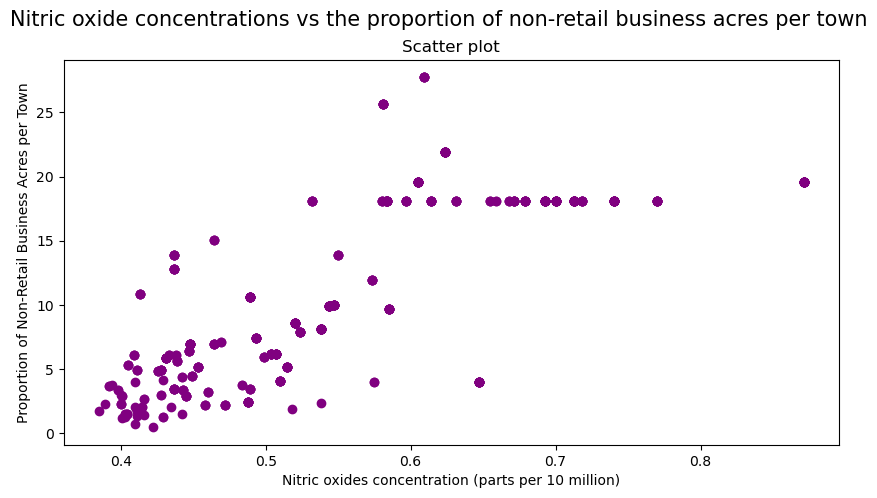

In [13]:
fig = plt.figure(figsize =(10, 5))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], color='purple')
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.suptitle('Nitric oxide concentrations vs the proportion of non-retail business acres per town', size=15)
plt.title('Scatter plot')
plt.show()

**Explanation:** We can see positive relationship between Nitric oxides concentration and Proportion of Non-Retail Business Acres per Town.

### 2.5. Create a **histogram** for the pupil to teacher ratio variable

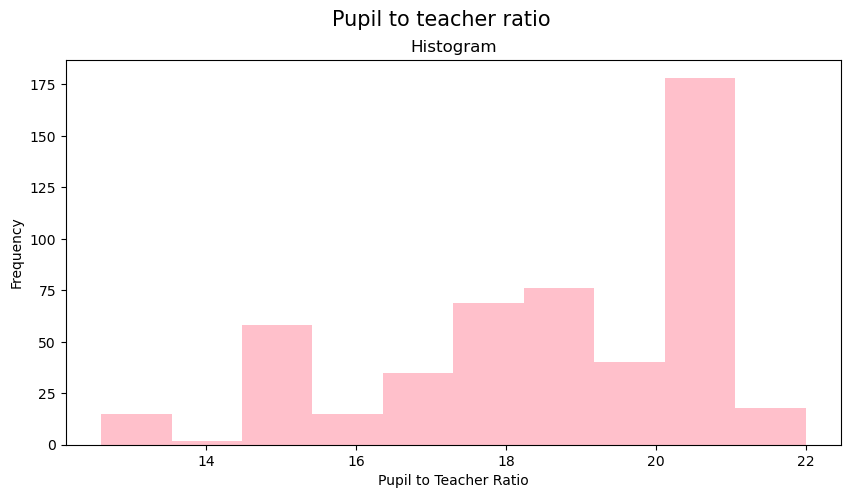

In [14]:
fig = plt.figure(figsize =(10, 5))
plt.hist(boston_df['PTRATIO'], color='pink')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.suptitle('Pupil to teacher ratio', size=15)
plt.title('Histogram')
plt.show()

**Explanation:** Distribution of the pupil to teacher ratio variable is positively skewed with mode at 21.

## Task 3: Use the appropriate tests to answer the questions provided

### 3.1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met:

* One independent, categorical variable with two levels or group
* One dependent continuous variable
* Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
* The dependent variable must follow a normal distribution
* Assumption of homogeneity of variance

Hypothesis:

*   $H_0: µ_1 = µ_2$ (There is no difference in median value of houses bounded by the Charles river and not)
*   $H_1: µ_1 ≠ µ_2$ (There is difference in median value of houses bounded by the Charles river and not)

We can use the Levene's Test in Python to check test significance:

In [15]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05, the variances are not equal. For the purposes of this exercise, we will assume equality of variances and run t-test:

In [16]:
bounded_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
bounded_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
scipy.stats.ttest_ind(bounded_0, bounded_1, equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on Charles river bounding.

### 3.2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)?

Hypothesis:

*   $H_0: µ_1 = µ_2 = µ_3$ (There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE))
*   $H_1:$ At least one of the means differ (There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE))

Test for equality of variance:

In [17]:
scipy.stats.levene(age_group_1, age_group_2, age_group_3, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05 we can assume equality of variance and run ANOVA analysis:

In [18]:
scipy.stats.f_oneway(age_group_1, age_group_2, age_group_3)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesiss as there is enough proof that there is a statistical difference in median value of houses for each proportion of owner occupied units built prior to 1940.

### 3.3.Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)?

Hypothesis:

* $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test:

In [19]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### 3.4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)?

Hypothesis:

* $H_0: β_1 = 0$ (Weighted distance to five Boston employment centres has no impact on the median value of owner occupied homes)
* $H_1: β_1 ≠ 0$ (Weighted distance to five Boston employment centres has impact on the median value of owner occupied homes)

We run Ordinary Least Squares regression analysis:

In [20]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        14:01:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. Linear regression coefficient is equal to 1.0916, i.e. additional weighted distance to the five Boston employment centers would increase median value of owner occupied homes by \\$1,091.60.